# Compare semantic graphs from two different models

In [1]:
import sys
PATHS_TO_ADD = [
    "../src"
]
for p in PATHS_TO_ADD:
    if p not in sys.path:
        sys.path.append(p)

In [2]:
from linguistic_analysis.semantics.similarity import SemGraph

In [3]:
import os
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

Load the embedding models

In [4]:
FULL_MODEL_PATH = "../models/french_novels/balzac/joint/accents_lemmatized/balzac_w2v_sg_w10_mincount5_ep/balzac_w2v_sg_w10_mincount5_ep.model"
MODEL_PATH = "../models/french_novels/balzac/separate/with_accents_lemmatized/Eugenie Grandet - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model"

full_model = KeyedVectors.load(FULL_MODEL_PATH)
model = KeyedVectors.load(MODEL_PATH)

**Key words**

1. Argent
2. Payement = paiement
3. Banque
4. Banquier
5. Crédit
6. Créancier
7. Capital
8. Dépôt
9. Prêt
10. Remboursement
11. Créance
12. Prix
13. Dette
14. Bail
15. Revenus (se pone únicamente en plural)
16. Rente
17. Francs (moneda; plural)
18. Louis d’or (moneda, plural)
19. Écus (moneda, plural)
20. Budget

In [5]:
base_words = [
    "argent",
    "payement", 
    "paiement",
    "banque",
    "banquier",
    "crédit",
    "créancier",
    "capital",
    "dépôt",
    "prêt",
    "remboursement",
    "créance",
    "prix",
    "dette",
    "bail",
    "revenu",
    "rente",
    "franc",
#    "louis d’or",
    "écus",
    "budget"
]

In [6]:
N_TOP_SIMILAR = 10
SIMILARITY_THRESHOLD = 0.4
full_sem_graph = SemGraph.build_from_gensim_embedding(full_model, base_words, 
                                                      n_top_similar=N_TOP_SIMILAR,
                                                      similarity_threshold=SIMILARITY_THRESHOLD)
sem_graph = SemGraph.build_from_gensim_embedding(model, base_words,
                                                 n_top_similar=N_TOP_SIMILAR,
                                                 similarity_threshold=SIMILARITY_THRESHOLD)

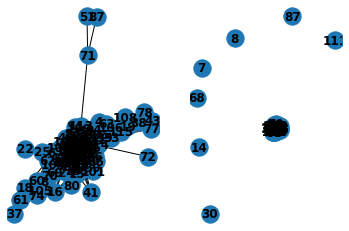

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

plt.subplot(121)
nx.draw(full_sem_graph.graph, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw(sem_graph.graph, with_labels=True, font_weight='bold')

Augment graphs to compare them:
1. Generate 2 semgraphs: G1 and G2
2. Get the union of the sets of nodes (words) of G1 (N1) and G2 (N2): N12
3. Generate new semgraphs:
  - G1* = augment(G1, N12)
  - G2* = augment(G2, N12)
4. Compare G1* and G2*


**If M semgraphs are to be compared, get the union of the sets of nodes (words) of the M semgraphs**

In [8]:
full_sem_gaph_words = set(full_sem_graph.names)
sem_graph_words = set(sem_graph.names)
augmented_words = full_sem_gaph_words.union(sem_graph_words)

In [9]:
full_sem_graph_augmented = full_sem_graph.get_augmented_graph(augmented_words)
sem_graph_augmented = sem_graph.get_augmented_graph(augmented_words)

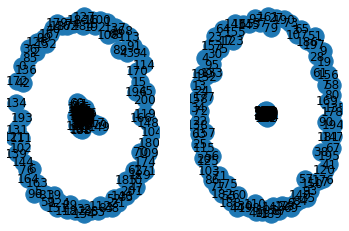

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

plt.subplot(121)
#nx.draw(full_sem_graph_augmented.graph, with_labels=True, font_weight='bold')
nx.draw(full_sem_graph_augmented.graph, with_labels=True)
plt.subplot(122)
#nx.draw(sem_graph_augmented.graph, with_labels=True, font_weight='bold')
nx.draw(sem_graph_augmented.graph, with_labels=True)

In [11]:
full_sem_graph_augmented.reset()
sem_graph_augmented.reset()
full_sem_graph_augmented.get_semantic_distance(sem_graph_augmented, 10, normalize=True)

270.25773966566396

**Note:**

Etrategies to augment a semgraph:
1. Just add new nodes
2. Add new nodes and their internal similarities

**TODO**: analyse pros and cons


**Note:**

**TODO**: Analyse the consistency of semantic comparison of semgraphs with respect to different trainings.